# Exploratory Data Analysis: Heart Disease UCI Dataset

**Author:** MLOps Assignment  
**Date:** January 2026  
**Dataset:** UCI Machine Learning Repository - Heart Disease Dataset

## Objective

This notebook performs comprehensive exploratory data analysis on the Heart Disease UCI dataset to:
- Understand the distribution of features
- Identify missing values and data quality issues
- Analyze relationships between features
- Examine class balance
- Generate insights for feature engineering and model development


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline


## 1. Data Loading

The UCI Heart Disease dataset contains 14 features from patient health records. Let's load and inspect the raw data.


In [2]:
# Download data if not already present
import sys
sys.path.append('..')
from src.download_data import download

data_path = Path('../data/raw/heart.csv')
data_path.parent.mkdir(parents=True, exist_ok=True)

if not data_path.exists():
    print("Downloading dataset...")
    download(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
        data_path
    )
    print("Download complete!")
else:
    print("Dataset already exists.")


Download complete!


In [3]:
# Define column names based on UCI dataset documentation
column_names = [
    'age',        # Age in years
    'sex',        # Sex (1 = male; 0 = female)
    'cp',         # Chest pain type (1-4)
    'trestbps',   # Resting blood pressure (mm Hg)
    'chol',       # Serum cholesterol (mg/dl)
    'fbs',        # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',    # Resting electrocardiographic results (0-2)
    'thalach',    # Maximum heart rate achieved
    'exang',      # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak',    # ST depression induced by exercise
    'slope',      # Slope of the peak exercise ST segment (0-2)
    'ca',         # Number of major vessels colored by fluoroscopy (0-3)
    'thal',       # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    'target'      # Diagnosis of heart disease (0 = no disease, 1-4 = disease)
]

# Load the dataset
df = pd.read_csv(data_path, header=None, names=column_names)

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 1}")


Dataset shape: (303, 14)
Total samples: 303
Total features: 13


In [4]:
# Display first few rows
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## 2. Data Quality Assessment

### 2.1 Missing Values Analysis


In [5]:
# Check for missing values (marked as '?')
df_clean = df.replace('?', np.nan)

# Convert to numeric
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Missing values summary
missing_data = pd.DataFrame({
    'Missing_Count': df_clean.isnull().sum(),
    'Percentage': (df_clean.isnull().sum() / len(df_clean)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_data)



Missing Values Summary:
      Missing_Count  Percentage
ca                4    1.320132
thal              2    0.660066


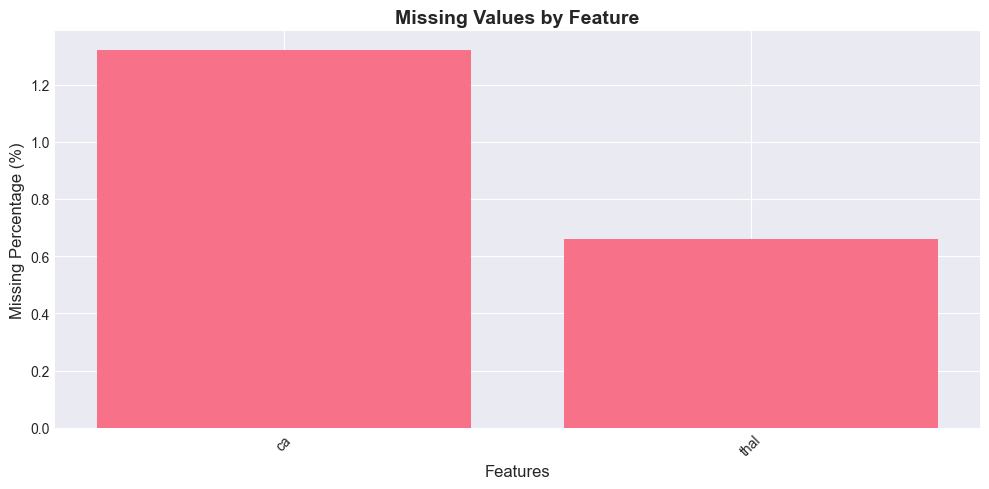

In [6]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    plt.bar(missing_data.index, missing_data['Percentage'])
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")


### 2.2 Basic Statistics


In [7]:
# Statistical summary
df_clean.describe().round(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,301.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


In [8]:
# Data types
print("\nData Types:")
print(df_clean.dtypes)

print("\nUnique Values per Feature:")
for col in df_clean.columns:
    print(f"{col}: {df_clean[col].nunique()} unique values")



Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Unique Values per Feature:
age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 50 unique values
chol: 152 unique values
fbs: 2 unique values
restecg: 3 unique values
thalach: 91 unique values
exang: 2 unique values
oldpeak: 40 unique values
slope: 3 unique values
ca: 4 unique values
thal: 3 unique values
target: 5 unique values


## 3. Target Variable Analysis

The target variable represents the presence of heart disease (0 = no disease, 1-4 = disease levels).


In [9]:
# Target distribution (original)
print("Original Target Distribution:")
print(df_clean['target'].value_counts().sort_index())
print(f"\nTotal Disease Cases (target > 0): {(df_clean['target'] > 0).sum()}")
print(f"No Disease Cases (target = 0): {(df_clean['target'] == 0).sum()}")


Original Target Distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Total Disease Cases (target > 0): 139
No Disease Cases (target = 0): 164


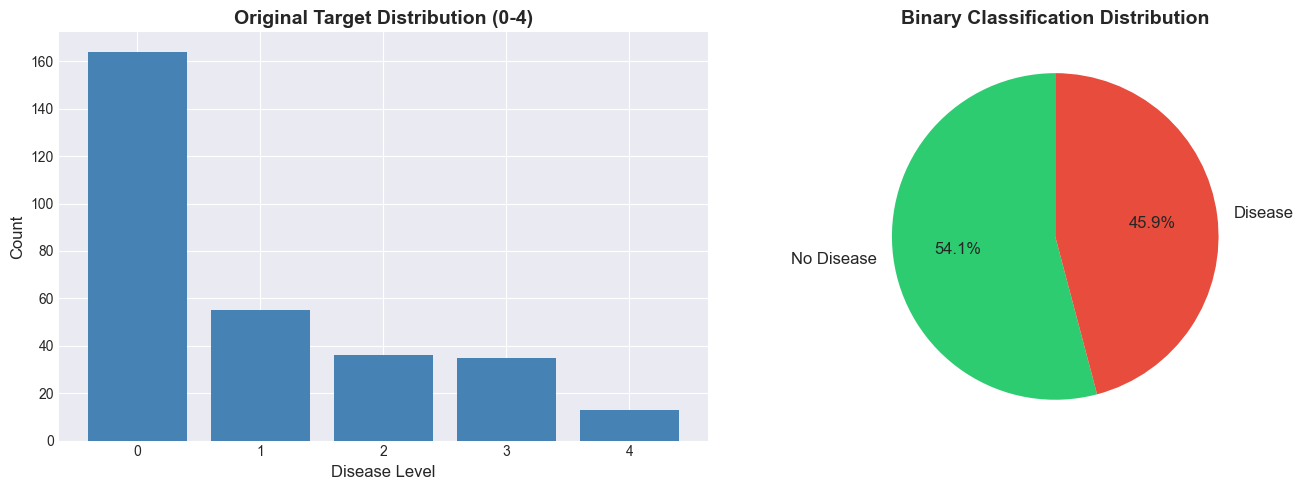


Class Balance Ratio (Disease:No Disease) = 139:164
Percentage with Disease: 45.9%


In [10]:
# Convert to binary classification
df_clean['target_binary'] = (df_clean['target'] > 0).astype(int)

# Class balance visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original target distribution
target_counts = df_clean['target'].value_counts().sort_index()
axes[0].bar(target_counts.index, target_counts.values, color='steelblue')
axes[0].set_xlabel('Disease Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Original Target Distribution (0-4)', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(5))

# Binary target distribution
binary_counts = df_clean['target_binary'].value_counts()
labels = ['No Disease', 'Disease']
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(binary_counts.values, labels=labels, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Binary Classification Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Balance Ratio (Disease:No Disease) = {binary_counts[1]:.0f}:{binary_counts[0]:.0f}")
print(f"Percentage with Disease: {(binary_counts[1]/len(df_clean))*100:.1f}%")


## 4. Feature Distributions

### 4.1 Continuous Features


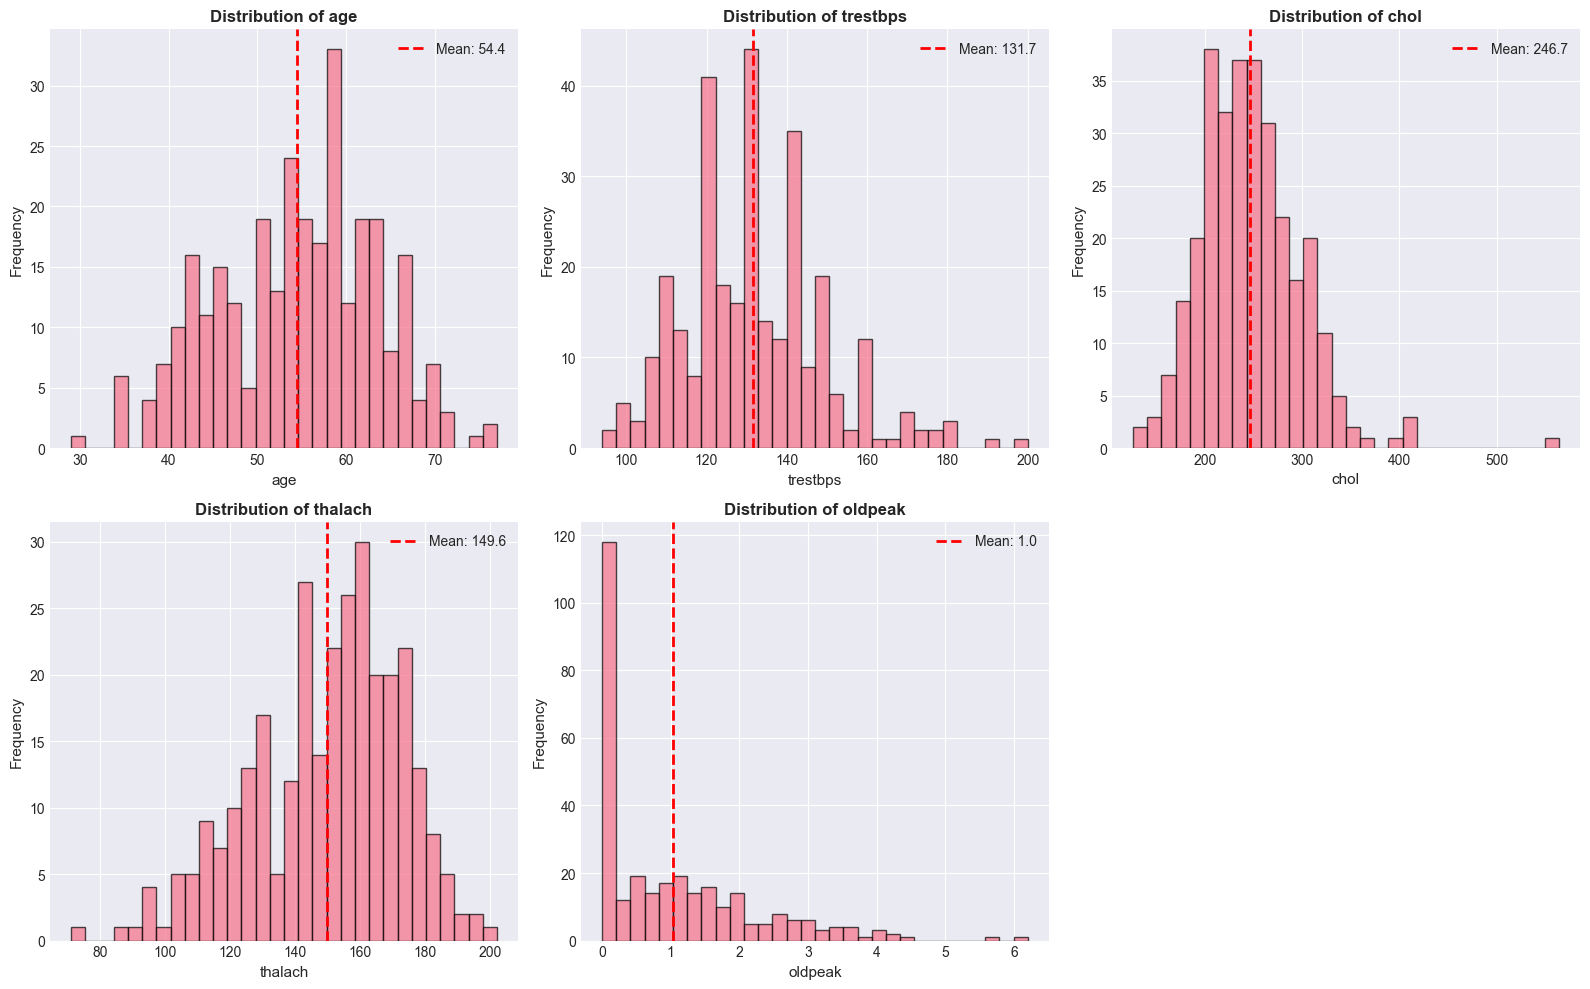

In [11]:
# Identify continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms for continuous features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(continuous_features):
    axes[idx].hist(df_clean[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {df_clean[col].mean():.1f}')
    axes[idx].legend()

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


### 4.2 Categorical Features


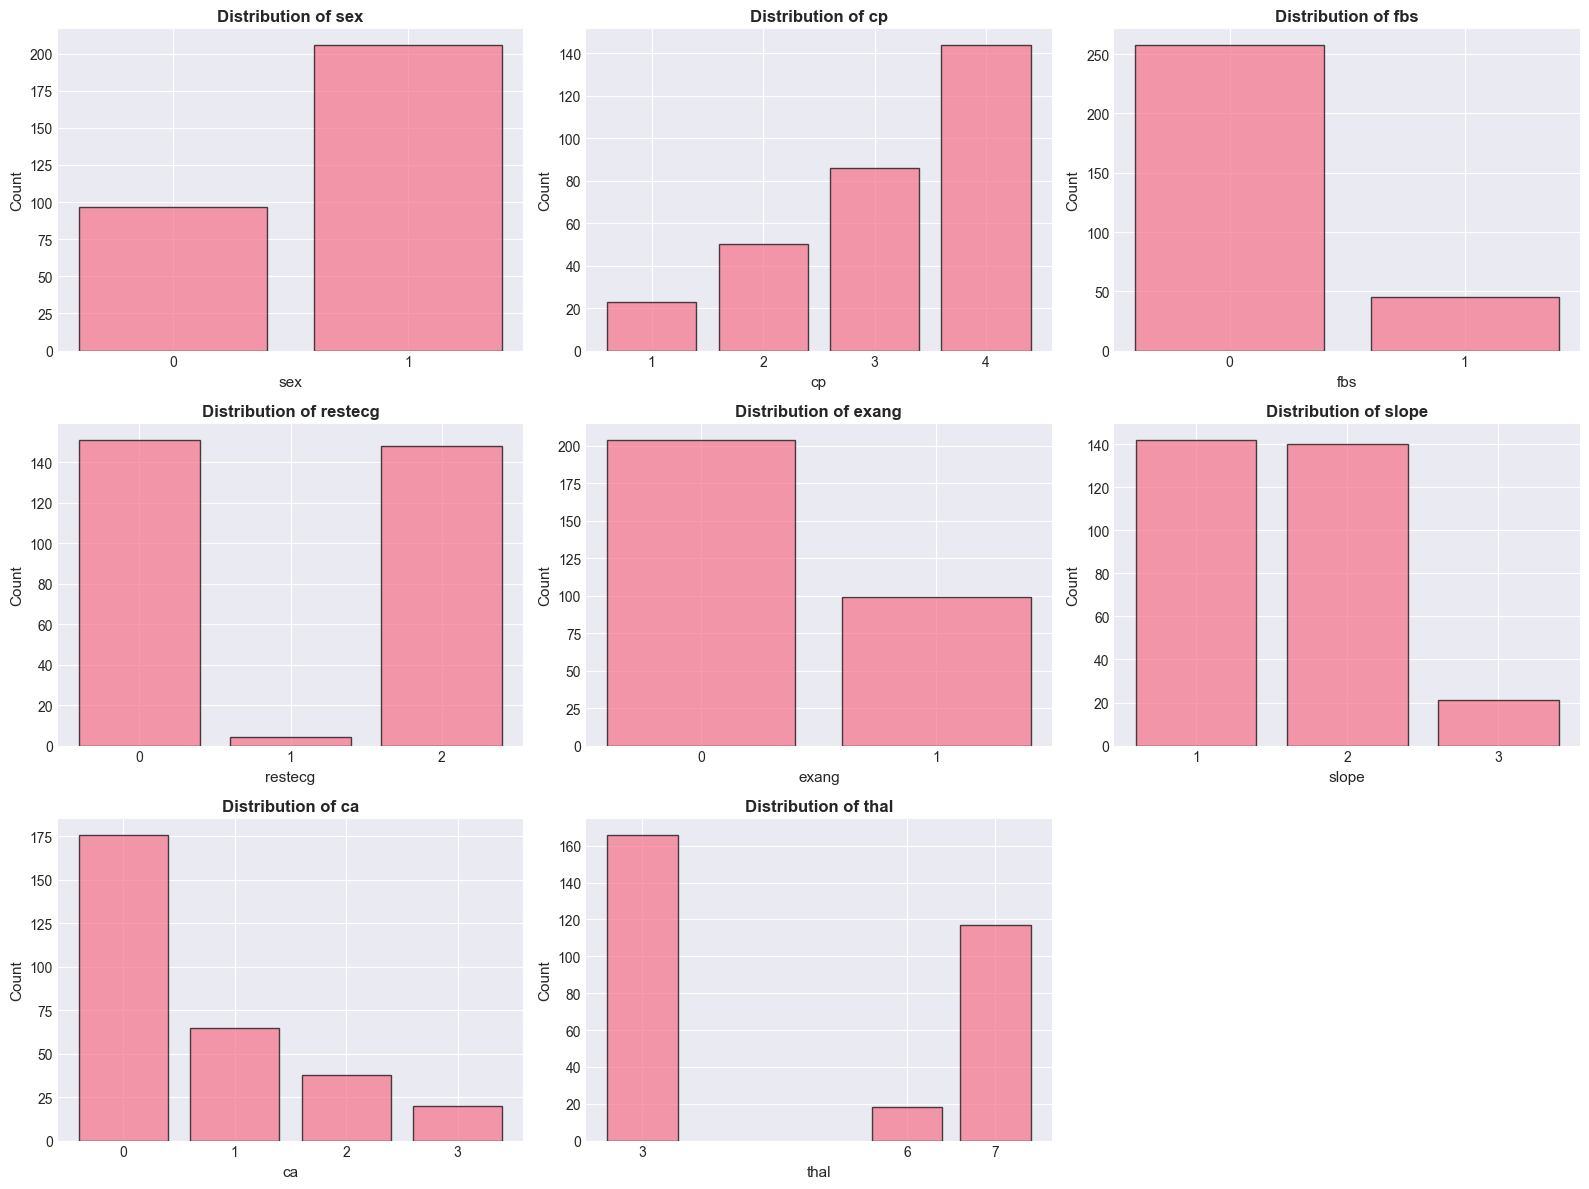

In [12]:
# Identify categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot bar charts for categorical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df_clean[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(value_counts.index)

# Remove extra subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()


## 5. Feature Relationships and Correlations

### 5.1 Correlation Heatmap


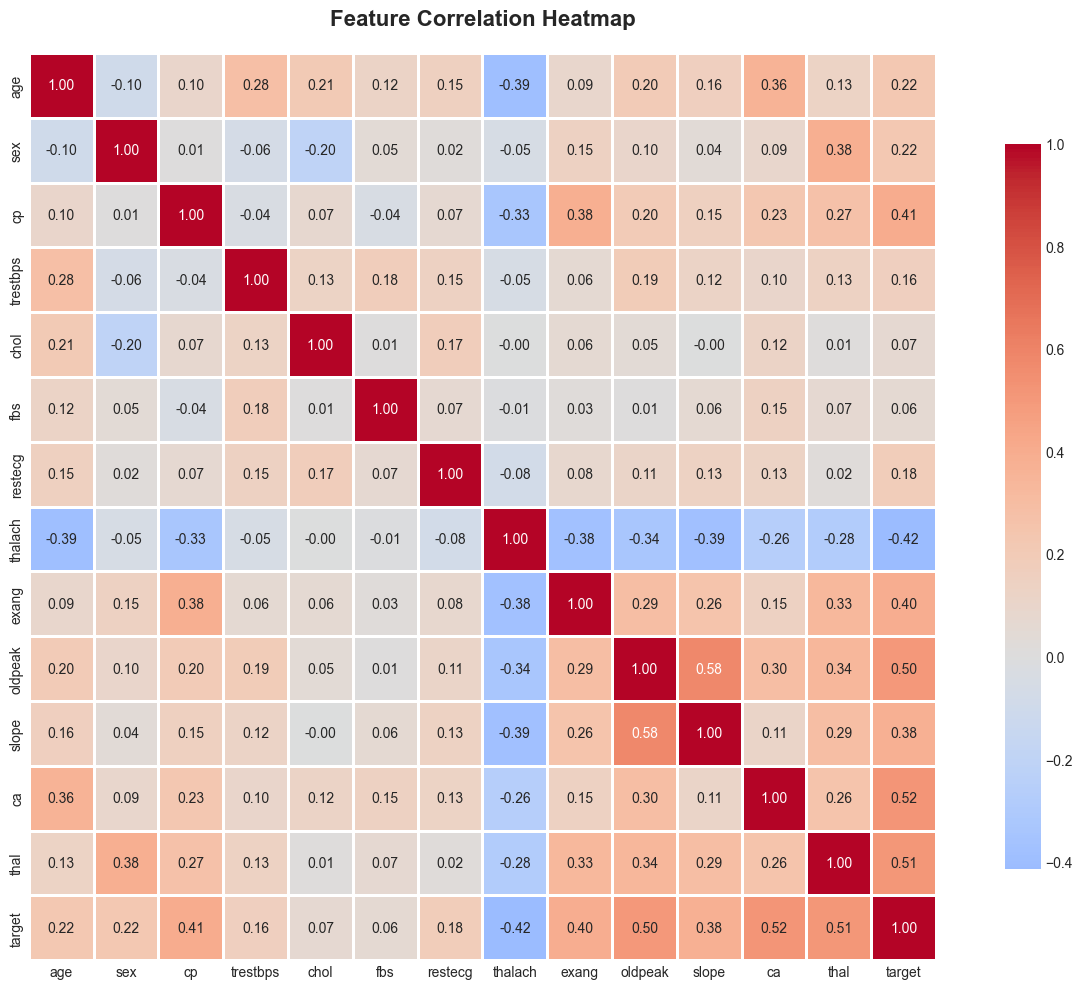

In [13]:
# Calculate correlation matrix
correlation_matrix = df_clean.drop('target_binary', axis=1).corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



Top Features Correlated with Target:
ca          0.518909
thal        0.509923
oldpeak     0.504092
thalach     0.415040
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
Name: target, dtype: float64


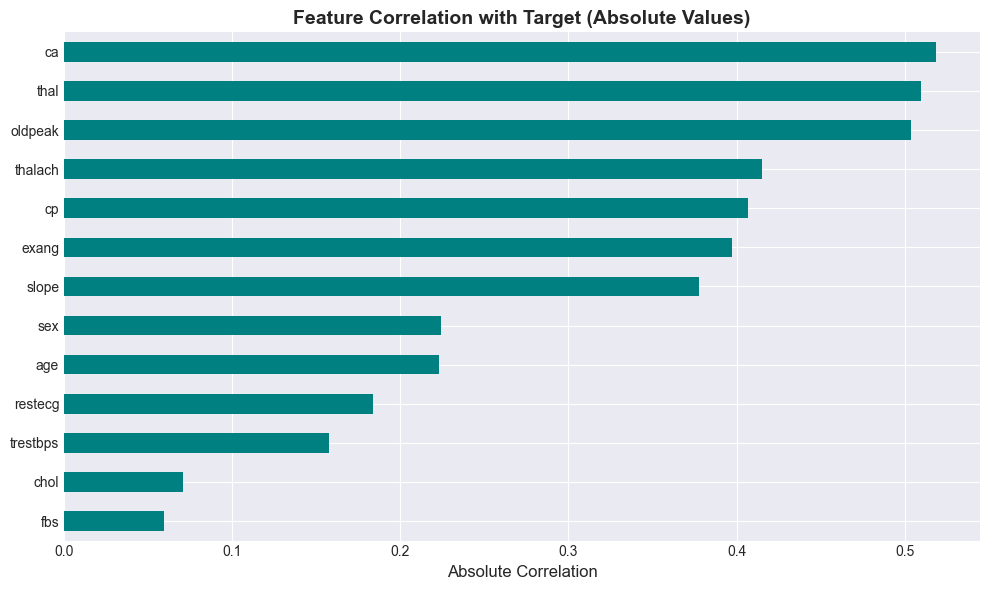

In [14]:
# Top correlations with target
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\nTop Features Correlated with Target:")
print(target_corr[1:])  # Exclude target itself

# Visualize
plt.figure(figsize=(10, 6))
target_corr[1:].plot(kind='barh', color='teal')
plt.xlabel('Absolute Correlation', fontsize=12)
plt.title('Feature Correlation with Target (Absolute Values)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 5.2 Feature Distributions by Target Class


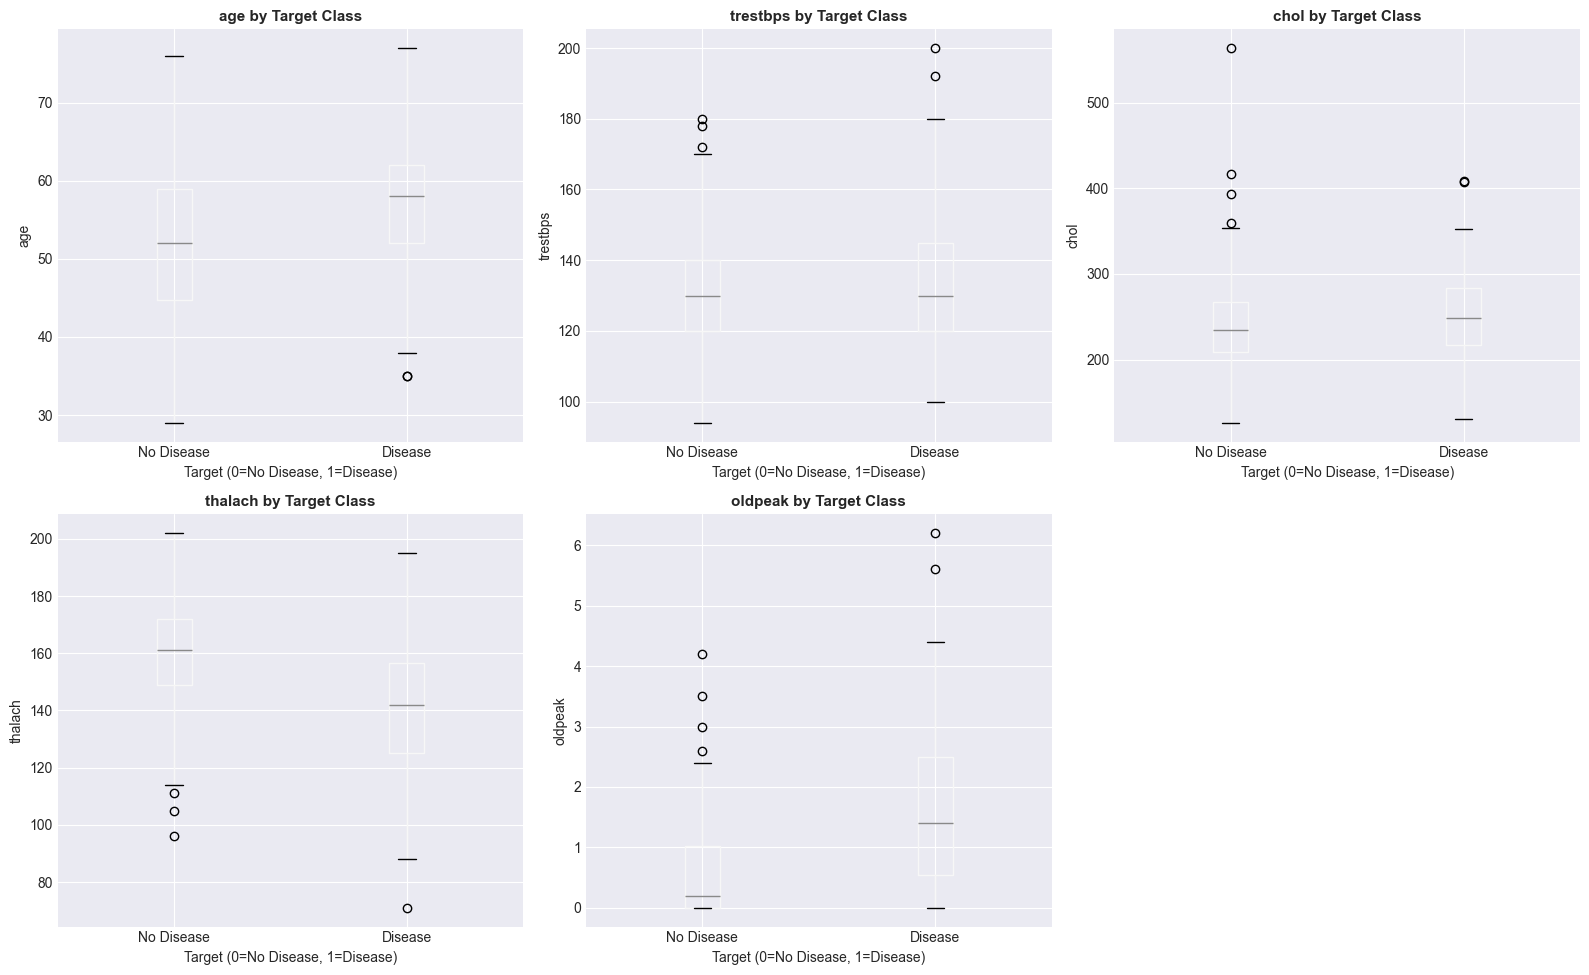

In [15]:
# Box plots for continuous features by target class
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(continuous_features):
    df_clean.boxplot(column=col, by='target_binary', ax=axes[idx])
    axes[idx].set_xlabel('Target (0=No Disease, 1=Disease)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'{col} by Target Class', fontsize=11, fontweight='bold')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No Disease', 'Disease'])

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()


### 5.3 Categorical Features vs Target


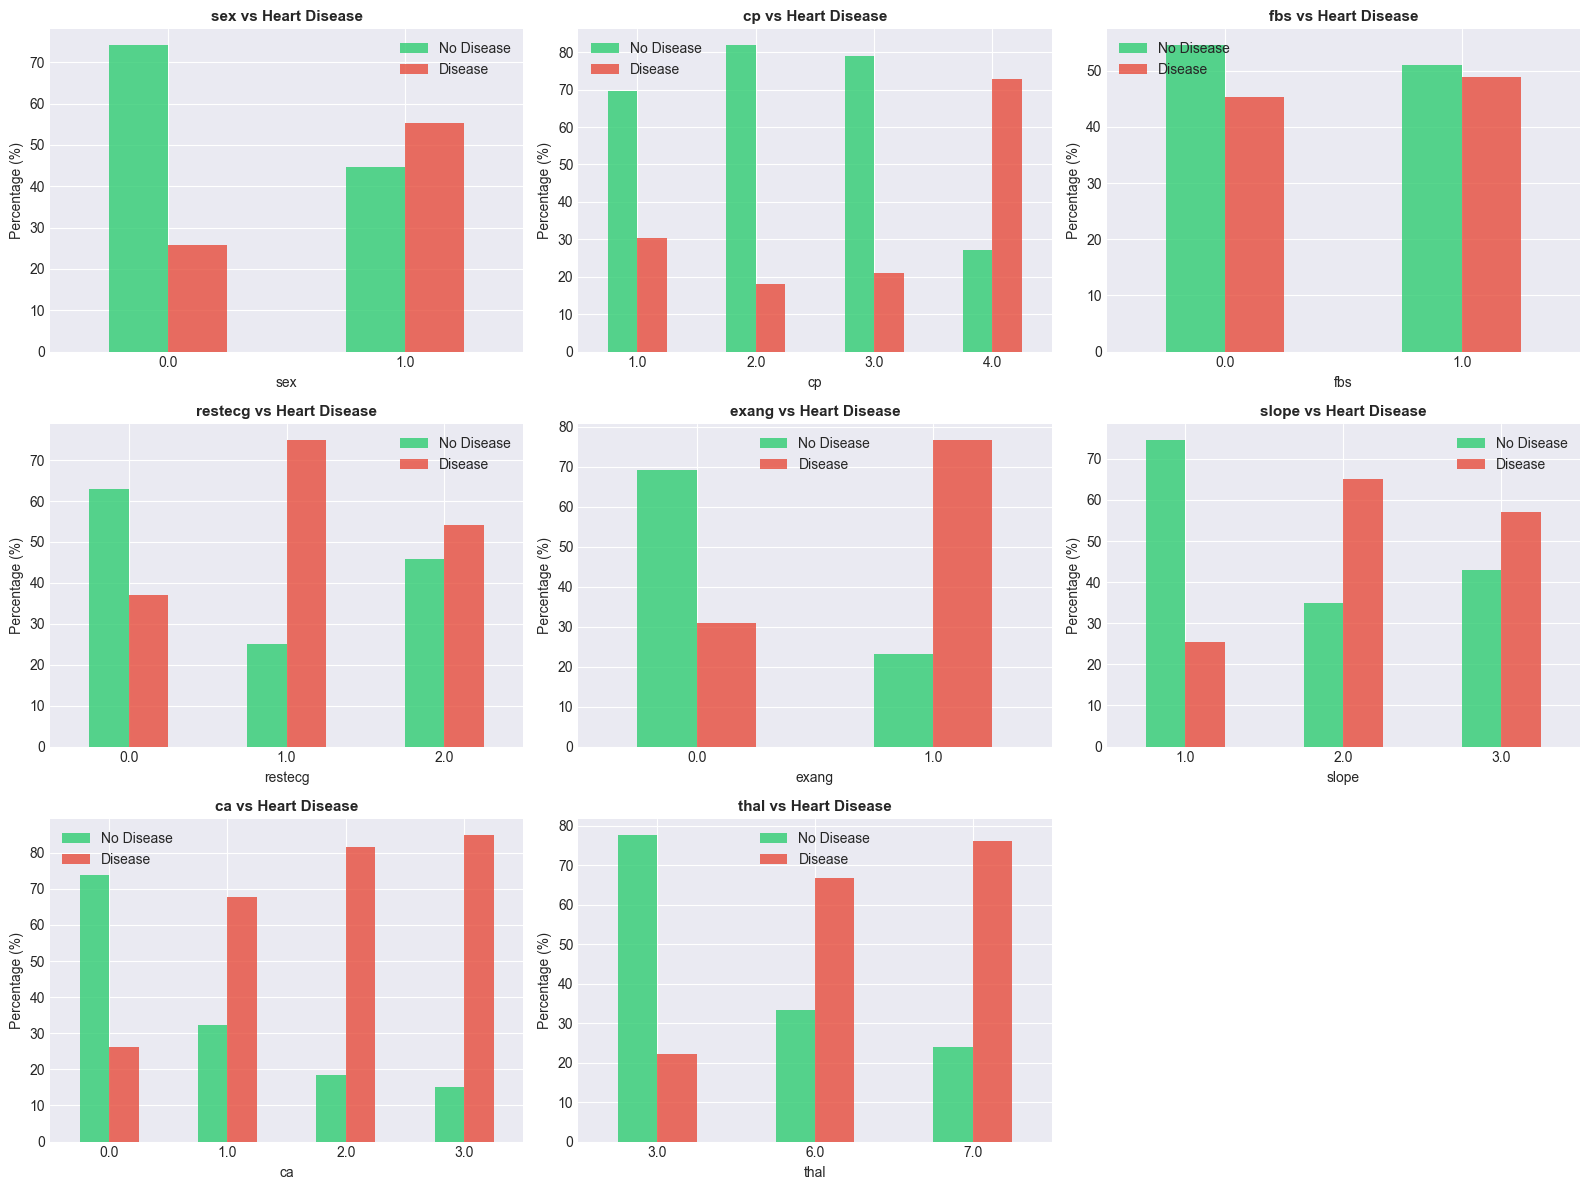

In [16]:
# Grouped bar charts for categorical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    ct = pd.crosstab(df_clean[col], df_clean['target_binary'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], alpha=0.8)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].set_title(f'{col} vs Heart Disease', fontsize=11, fontweight='bold')
    axes[idx].legend(['No Disease', 'Disease'], loc='best')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

# Remove extra subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()


## 6. Key Insights and Observations

### Summary of Findings:

1. **Dataset Size**: The dataset contains 303 samples with 14 features.

2. **Missing Values**: Some features (ca, thal) may contain missing values marked as '?', requiring imputation.

3. **Class Balance**: The binary classification shows relatively balanced classes, making it suitable for standard classification algorithms.

4. **Feature Correlations**:
   - Strong correlations with target: cp (chest pain), thalach (max heart rate), exang (exercise angina)
   - These features are likely to be important predictors

5. **Feature Distributions**:
   - Age distribution is fairly normal with mean around 54 years
   - Most patients are male (sex = 1)
   - Cholesterol and blood pressure show some outliers

### Recommendations for Modeling:

1. **Preprocessing**:
   - Handle missing values using median imputation
   - Standardize continuous features for models sensitive to scale
   - Keep categorical features as-is (already numeric)

2. **Feature Engineering**:
   - Consider interaction features between highly correlated variables
   - Age groups or binning might help capture non-linear relationships

3. **Model Selection**:
   - Try both linear (Logistic Regression) and non-linear (Random Forest) models
   - Use cross-validation for robust evaluation
   - Focus on metrics: ROC-AUC, precision, recall (clinical context matters)

4. **Validation Strategy**:
   - Stratified k-fold cross-validation to maintain class balance
   - Monitor for overfitting given small dataset size


## 7. Save Processed Data

Save the cleaned dataset for model training.


In [17]:
# Save cleaned data with binary target
output_path = Path('../data/processed')
output_path.mkdir(parents=True, exist_ok=True)

# Use the target_binary as the target
df_final = df_clean.drop('target_binary', axis=1).copy()
df_final['target'] = (df_clean['target'] > 0).astype(int)

# Fill missing values with median
df_final = df_final.fillna(df_final.median(numeric_only=True))

df_final.to_csv(output_path / 'heart_processed.csv', index=False)
print(f"\nProcessed data saved to: {output_path / 'heart_processed.csv'}")
print(f"Final shape: {df_final.shape}")



Processed data saved to: ../data/processed/heart_processed.csv
Final shape: (303, 14)


---

## Conclusion

This EDA has provided comprehensive insights into the Heart Disease dataset. The analysis reveals:
- Well-balanced classification problem
- Several strong predictive features
- Minimal data quality issues
- Clear patterns distinguishing disease vs no-disease cases
---
